# Privacy Policy Study: 
## Examining the Privacy Policies of Popular Websites
  
**Ellie Frith**  
  
**April 28, 2020**

### Part I: Import and Pre-Process Privacy Policy Dataset 
- Import relevant libraries
- Read in data
- Pre-process/ clean (remove /n, etc.)

In [1]:
# Import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data
policy_data = pd.read_excel('Privacy_Policies.xlsx')

In [3]:
# Examine data set
policy_data.head()

,Website,Policy_text,Date,Location,Source
0,Facebook,Data Policy\nThis policy describes the informa...,2018-04-19,USA,https://www.facebook.com/policy.php
1,Facebook,California Privacy Notice\n\nThis California P...,2020-01-01,California,https://www.facebook.com/legal/policy/ccpa
2,Google,We build a range of services that help million...,2020-03-31,USA,https://policies.google.com/privacy?hl=en-US
3,Google,California requirements\n\nIf the California C...,2020-03-31,California,https://policies.google.com/privacy?hl=en-US
4,Twitter,Basic Account Information\n\nYou don’t have to...,2020-01-01,USA,https://twitter.com/en/privacy


In [4]:
set(list(policy_data.Website))

{'Amazon',
 'Apple',
 'Facebook',
 'Firefox',
 'Github',
 'Google',
 'Google Chrome',
 'Instagram',
 'LinkedIn',
 'PayPal',
 'Pinterest',
 'Reddit',
 'Slack',
 'Snapchat',
 'Spotify',
 'TikTok',
 'Twitter',
 'Venmo',
 'WhatsApp',
 'YouTube',
 'Zoom'}

In [5]:
# Write function to clean/ pre-process data

def policy_clean(policy): 
    
    # Remove new line indicators
    policy = policy.replace('\n',' ')
    
    # Replace punctuation, except apostrophe, with whitespace:
    punct = ".,:;/?<>\(\)*&^%$#@!`~\"\[\]\{\}-_+=—"
    for i in punct:
        policy = policy.replace(i, " ")
    
    # Make lowercase
    policy = policy.lower()
    
    # Split into words by whitespace
    words = policy.split()
    
    return words

In [6]:
# Clean policies & separate by word

policy_data['Clean_Policy'] = policy_data['Policy_text'].apply(policy_clean)

### Part II: Generate Statistics of Interest for Privacy Policy Dataset
- Word counts for each policy
- Average word count for privacy policies applicable to the United States
- Average word count for California addendums
- Total word count for U.S.-applicable policies and California addendums
- Count of vague words for each policy
- Percent of words that are vague for each policy
- Reading time for each policy (assuming speed of 300 wpm)
- Average reading time for U.S. applicable policies
- Total reading time for U.S. applicable policies and California addendums

In [7]:
# Get word count for each policy

policy_data['Word_Count'] = policy_data['Clean_Policy'].apply(len)

In [8]:
# Get average word count for US and World policies
policy_data.Word_Count[policy_data['Location'].isin(['USA','World'])].mean()

3682.9523809523807

In [9]:
# Get average word count for California addendums
policy_data.Word_Count[policy_data['Location']== 'California'].mean()

925.2222222222222

In [10]:
# Total word count for all US, World, and California policies
policy_data.Word_Count[policy_data['Location'].isin(['USA','World','California'])].sum()

85669

In [11]:
# Get count of vague words for each policy

def vague_count(word_list):
    
    vague_words = ["may", "most", "some", "might", "should", "probable","probably", "about", "roughly", "maybe",
                   "could", "almost", "perhaps", "occasionally", "occaisional", "normally","ordinarily","certain",
                   "general", "many", "various", "sometimes","reasonable","reasonably", "usually","periodically",
                   "depending", "applicable", "typically","often","generally", "commonly","widely","primarily",
                   "largely","mostly", "likely","would", "can","periodical"]
    
    count = 0
    
    for word in word_list:
        if word in vague_words:
            count = count+1
            
    return count

In [12]:
policy_data["Vague_Count"] = policy_data['Clean_Policy'].apply(vague_count)

In [13]:
# Get average vague count for US and World policies
policy_data.Vague_Count[policy_data['Location'].isin(['USA','World'])].mean()

107.0952380952381

In [14]:
# Get percentage of policy words that are vague

policy_data["Vague_Percent"] = policy_data['Vague_Count']/policy_data['Word_Count']

In [15]:
# Calculate minutes needed to read each policy, assuming average person reads 300 wpm

policy_data['Reading_Time'] = policy_data['Word_Count']/300

In [16]:
# Average reading time for all US and World policies
policy_data.Reading_Time[policy_data['Location'].isin(['USA','World'])].mean()

12.276507936507937

In [17]:
# Total reading time (in hours) for all US, World, and California policies in data set
policy_data.Reading_Time[policy_data['Location'].isin(['USA','World','California'])].sum()/60

4.75938888888889

In [18]:
policy_data.head()

,Website,Policy_text,Date,Location,Source,Clean_Policy,Word_Count,Vague_Count,Vague_Percent,Reading_Time
0,Facebook,Data Policy\nThis policy describes the informa...,2018-04-19,USA,https://www.facebook.com/policy.php,"[data, policy, this, policy, describes, the, i...",4175,124,0.029701,13.916667
1,Facebook,California Privacy Notice\n\nThis California P...,2020-01-01,California,https://www.facebook.com/legal/policy/ccpa,"[california, privacy, notice, this, california...",1250,42,0.033600,4.166667
2,Google,We build a range of services that help million...,2020-03-31,USA,https://policies.google.com/privacy?hl=en-US,"[we, build, a, range, of, services, that, help...",3748,115,0.030683,12.493333
3,Google,California requirements\n\nIf the California C...,2020-03-31,California,https://policies.google.com/privacy?hl=en-US,"[california, requirements, if, the, california...",449,15,0.033408,1.496667
4,Twitter,Basic Account Information\n\nYou don’t have to...,2020-01-01,USA,https://twitter.com/en/privacy,"[basic, account, information, you, don’t, have...",4947,135,0.027289,16.490000


### Part III: Import and Pre-Process Privacy Survey Results
- Read in data 
- Subset and clean data (reformat binary variables, etc.)

In [19]:
# Read in data
survey_results = pd.read_csv("Privacy_Survey_05012020.csv")

In [20]:
# Take only key columns and rows 
questions = survey_results.iloc[0,10:]
key_cols = ['Finished','RecordedDate','Q9','Q8','Q1','Q2','Q3','Q4','Q5','Q6','Q7']
clean_results = survey_results.loc[3:,key_cols]

In [21]:
# Rename colums

clean_results.rename(columns = {'Q9':'internet_daily',
                                'Q8':'internet_required',
                                'Q1':'priv_important',
                                'Q2':'read_whole',
                                'Q3':'typically_read',
                                'Q4':'why_not',
                                'Q5':'change_beh',
                                'Q6':'breach_concern',
                                'Q7':'breach_affected'},
                    inplace = True)

In [22]:
# Write function to convert yes, no, and maybe questions to numeric keys 

def yes_no(cell):
    key = 0
    if cell == 'Yes':
        key = 1
    elif cell == "I don't know":
        key = 2
    return key

In [23]:
# Apply above function to applicable columns:

for i in (2,3,4,5,6,9,10):
    clean_results.iloc[:,i] = clean_results.iloc[:,i].apply(yes_no)

In [24]:
# Write function to convert messy 'why_not' variable strings into lists of responses

def reformat(why_nots):

    if pd.isnull(why_nots)==False:
        
        string_list = why_nots.split(',')
        for string in string_list:
            string = string.strip()
            
    else:
        string_list = why_nots   
    return(string_list)

In [25]:
# Apply above function to applicable column

clean_results.why_not = clean_results.why_not.apply(reformat)

In [50]:
clean_results.head()

,Finished,RecordedDate,internet_daily,internet_required,priv_important,read_whole,typically_read,why_not,change_beh,breach_concern,breach_affected
3,True,2020-04-29 17:19:24,1,1,1,0,0,"[Privacy policies are too long, Privacy polici...",NaN,1,2
4,True,2020-04-29 17:20:36,1,1,1,0,0,"[Privacy policies are too long, Privacy polici...",NaN,1,2
5,True,2020-04-29 17:24:00,1,1,1,0,0,"[Privacy policies are too long, I don't have t...",NaN,1,1
6,True,2020-04-29 17:24:48,1,1,1,0,0,"[Privacy policies are too long, I don't have t...",NaN,1,2
7,True,2020-04-29 17:25:12,1,1,1,0,0,"[Privacy policies are too long, I don't have t...",NaN,1,2


### Part IV: Generate Statistics of Interest for Privacy Survey Results

- Number of individuals who completed the survey

In [26]:
# Get number of entries in data set 

n = clean_results.shape[0]
n

82

- Number of respondents who use the internet daily:

In [27]:
clean_results.internet_daily.sum()

82

- Number of respondents whose work or education requires internet use:

In [28]:
clean_results.internet_required.sum()

81

- Number of respondents for whom data privacy is important:

In [29]:
clean_results.priv_important.sum()

77

- Number of respondents who have ever read an entire privacy policy:

In [30]:
clean_results.read_whole.sum()

11

- Number of respondents who typically read privacy policies:

In [31]:
clean_results.typically_read.sum()

1

- How often respondents who read privacy policies change their behavior based on those policies:

In [32]:
clean_results.change_beh[clean_results.typically_read == 1]

70    Always
Name: change_beh, dtype: object

- Get counts for reasons why people don't read privacy policies: 

In [33]:
# Write function to create list of all reasons given and apply function

def reason_list(df):
    
    reason_list = []
    
    for i in df.why_not:
        if type(i)!=float:
            for item in i:
                reason_list.append(item)  
                
    return reason_list



why_not_list = reason_list(clean_results)

In [34]:
# Put unique reasons in df

reasons_df = pd.DataFrame(set(why_not_list))
reasons_df.rename(columns = {0:'Reason'}, inplace = True)

In [35]:
# Get counts for each reason:

def reason_count(reason, why_not_list):
    count = 0
    
    for i in why_not_list:
        if i == reason:
            count = count+1
    return count

reasons_df['Count'] = reasons_df.Reason.apply(lambda x: reason_count(x, why_not_list))

In [36]:
# Display results
reasons_df.sort_values(by = 'Count', axis = 0, ascending = False, inplace = True)
reasons_df

,Reason,Count
5,Privacy policies are too long,74
0,I don't have time to read all the privacy poli...,59
1,Privacy policies are confusing,45
3,Privacy policies are uninformative,19
4,Other,12
6,I believe my personal information is not at risk,7
2,Web privacy does not concern me,3


- Number of respondents who are concerned by data breaches:

In [37]:
clean_results.breach_concern.sum()

76

- Number of respondents who have been affected by a data breach:

In [38]:
len(clean_results.breach_affected[clean_results.breach_affected == 1])

28

- Number of respondents who have not been affected by a data breach:

In [39]:
len(clean_results.breach_affected[clean_results.breach_affected == 0])

18

- Number of respondents who do not know whether they have been affected by a data breach:

In [40]:
len(clean_results.breach_affected[clean_results.breach_affected == 2])

36

### Part V: Visualize Quantities of Interest

- Plot of estimated time required to read company privacy policies

Text(0, 0.5, 'Est. Reading Time (avg. reading speed of 300 wpm)')

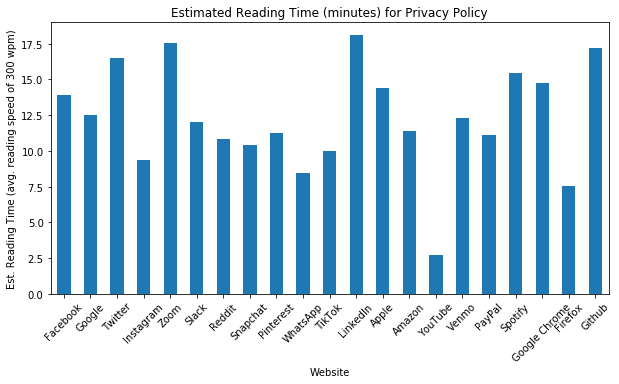

In [41]:
usa_data = policy_data[policy_data['Location'].isin(['USA','World'])]
plot = usa_data.plot(kind='bar', x = 'Website', y = 'Reading_Time', 
                       title ="Estimated Reading Time (minutes) for Privacy Policy", figsize=(10, 5), fontsize=10, 
                      legend = None)
plot.set_xticklabels(usa_data.Website, rotation=45)
plot.set_ylabel("Est. Reading Time (avg. reading speed of 300 wpm)")

- Plot of count of policy words that are coded as vague:

Text(0, 0.5, 'Vague Word Count')

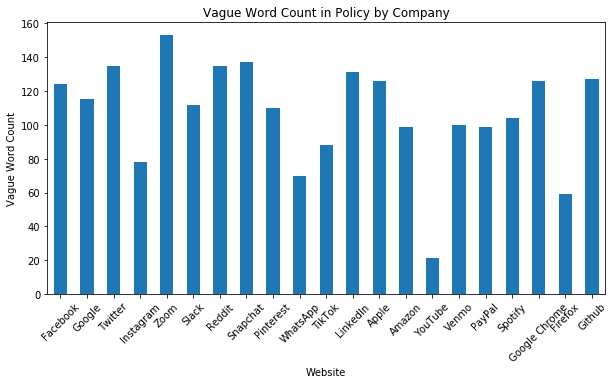

In [42]:
plot = usa_data.plot(kind='bar', x = 'Website', y = 'Vague_Count', 
                       title ="Vague Word Count in Policy by Company", figsize=(10, 5), fontsize=10, 
                      legend = None)
plot.set_xticklabels(usa_data.Website, rotation=45)
plot.set_ylabel("Vague Word Count")

- Pie chart of work or education internet use requirements

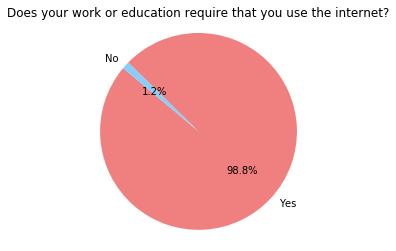

In [43]:
labels = 'Yes', 'No'
sizes = [sum(clean_results.internet_required==1), sum(clean_results.internet_required==0)]
colors = ['lightcoral', 'lightskyblue']

# Plot
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title(questions[1])
plt.show()

- Pie chart of data privacy importance

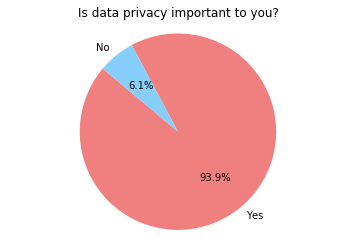

In [44]:
labels = 'Yes', 'No'
sizes = [sum(clean_results.priv_important==1), sum(clean_results.priv_important==0)]
colors = ['lightcoral', 'lightskyblue']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title(questions[2])
plt.show()

- Pie chart of has ever read privacy policy

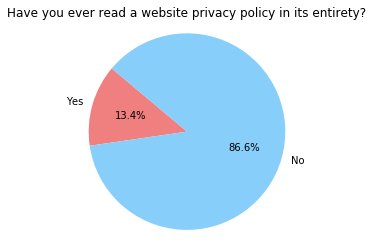

In [45]:
labels = 'Yes', 'No'
sizes = [sum(clean_results.read_whole==1), sum(clean_results.read_whole==0)]
colors = ['lightcoral', 'lightskyblue']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title(questions[3])
plt.show()

- Plot of typically read privacy policies

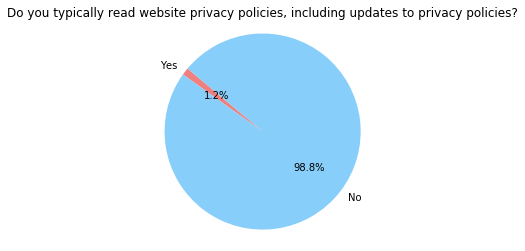

In [46]:
labels = 'Yes', 'No'
sizes = [sum(clean_results.typically_read==1), sum(clean_results.typically_read==0)]
colors = ['lightcoral', 'lightskyblue']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title(questions[4])
plt.show()

- Plot of reasons given for not reading privacy policies

Text(0, 0.5, 'Count')

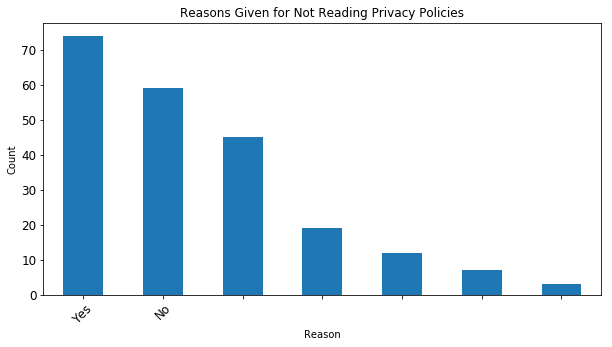

In [47]:
plot = reasons_df.plot(kind='bar', x = 'Reason', y = 'Count', 
                       title ="Reasons Given for Not Reading Privacy Policies", figsize=(10, 5), fontsize=12, 
                      legend = None)
plot.set_xticklabels(labels, rotation=45)
plot.set_ylabel("Count")

- Plot of data breach concern

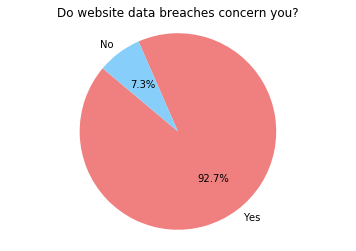

In [48]:
labels = 'Yes', 'No'
sizes = [sum(clean_results.breach_concern==1), sum(clean_results.breach_concern==0)]
colors = ['lightcoral', 'lightskyblue']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title(questions[7])
plt.show()

- Plot of affected by data breach 

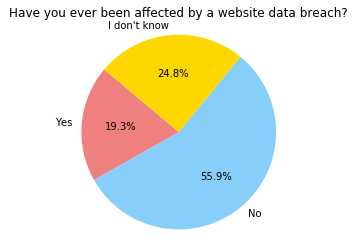

In [49]:
labels = 'Yes', 'No', "I don't know"
sizes = [sum(clean_results.breach_affected==1), sum(clean_results.typically_read==0), 
        sum(clean_results.breach_affected==2)]
colors = ['lightcoral', 'lightskyblue', 'gold']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title(questions[8])
plt.show()